In [9]:
utils::install.packages('devtools')
devtools::install_github("Lothelab/CMScaller")
BiocManager::install("Biobase")
BiocManager::install("org.Mm.eg.db")
BiocManager::install("biomaRt")
BiocManager::install("affy")
BiocManager::install("WGCNA")

### dependencies: run if not already installed
### limma has lof of dependencies - takes time
# source("https://bioconductor.org/biocLite.R")
#biocLite(c("Biobase", "limma"))




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'SCFA' from a github remote, the SHA1 (c1f9ca30) has not changed since last install.
  Use `force = TRUE` to force installation

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'Biobase'

Old packages: 'BiasedUrn', 'BiocManager', 'bslib', 'coloc', 'DT', 'epiR',
  'evaluate', 'foghorn', 'fontawesome', 'ggplot2', 'gmp', 'incidence',
  'IRkernel', 'jsonlite', 'lintr', 'lubridate', 'MendelianRandomization',
  'parsedate', 'pbdZMQ', 'pingr', 'pkgload', 'plotly', 'prevalence', 'ragg',
  'shiny', 'vctrs', 'xfun', 'zip', 'mgcv', 'rpart'




BiocGenerics (0.42.0 -> 0.44.0) [CRAN]
Biobase      (2.56.0 -> 2.58.0) [CRAN]


Installing 2 packages: BiocGenerics, Biobase

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpsbKlcg/remotes17855dac97b3/Lothelab-CMScaller-f154173/DESCRIPTION’ ... OK
* preparing ‘CMScaller’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘CMScaller_2.0.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'WGCNA'

also installing the dependencies ‘dynamicTreeCut’, ‘fastcluster’, ‘impute’, ‘doParallel’, ‘GO.db’


Old packages: 'BiasedUrn', 'BiocManager', 'bslib', 'coloc', 'DT', 'epiR',
  'evaluate', 'foghorn', 'fontawesome', 'ggplot2', 'gmp', 'incidence',
  'IRkernel', 'jsonlite', 'lintr', 'lubridate', 'MendelianRandomization',
  'parsedate', 'pbdZMQ', 'pingr', 'pkgload', 'plotly', 'prevalence', 'ragg',
  'RcppArmadillo', 'rmarkdown', 'shiny', 'vctrs', 'xfun', 'zip', 'mgcv',
  'rpart'



This script uses CMScaller tool to subclassify patients into CMS1, CMS2, CMS3, CMS4 or NA categories using nearest template prediction (NTP). See the original paper here: https://www.nature.com/articles/s41598-017-16747-x#Sec7

Potential improvements to this workflow include: 
    - wrap the preprocessing steps (based on input)into a function whose output we can pass to cmscaller easily based on input data

In [168]:
library(Biobase)
library(CMScaller)
library(limma)
library(dplyr)
library(tidyr)
library(WGCNA)

In [152]:
#sampleData <- read.table('data/tpm_per_sample.csv', sep=",",header = TRUE,row.names = 1,check.names=FALSE)

#replace file path with your own ExpressionSet, which should be in the format rownames x samples (rownames x col)
sampleData <- read.table('read_counts_per_canonical_gene.tsv', sep = '\t', row.names = 1, header = TRUE)
#use below drop duplicates based on entrez_id, if there are duplicates
#sampleData <- data %>% distinct(entrez_id, .keep_all = TRUE) 


In [153]:
#if you had to drop duplicates to make the gene name your row names, use this cell
#check what was dropped, if any
#dim(data)
#dim(sampleData)

#make the gene column your rownames
#rownames(sampleData) <- sampleData$entrez_id

In [154]:
head(sampleData)
dim(sampleData) #all genes


,X00ae9ab8.6eaa.4085.af72.26f96df97fa3,X00cdff29.697a.4a17.ba67.cf55c006b827,X01947597.c83a.4c5d.8a45.f1fe27992ad5,X0194feb1.d8be.45e5.9b95.0596090e9ecc,X019bfec7.ec6c.4cd6.808b.3e6e058e55f9,X01d414a2.2b77.41e8.8622.98b277f5dc85,X02033780.6bc1.407d.bd0f.45b6d74ae87b,X0228ad1c.d5ac.4938.9157.4f7738edf233,X025bf99d.1e89.43f3.b0b7.8dfe5d43e192,X026818a6.8180.4d9c.9357.b88a832b374e,⋯,fdceffa7.a393.45e6.98f2.f3292d1a38ea,fdd8e1d5.7004.419d.aaa3.d759799be4b7,fe1af065.a8a2.43c0.82a8.8b8f2ee217a1,ff05f6eb.bec7.48b8.a468.d286e2b76986,ff119a75.c47a.40bd.ac85.95725e40629a,ff2dac33.4531.4e98.8da4.959ec3443552,ff4233e9.37c2.43d5.b4c5.99a6d3878d3f,ff710149.0fc6.464a.93cb.e3b9bdcf3525,ff9b1f41.8be4.42d2.b2bd.96bcedc57f03,ffc0e668.4fc8.4278.abcd.67f7b57839c9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APC,6246,1459,1773,414,51,552,975,3700,910,1215,⋯,41,1313,15540,1821,392,532,875,256,2133,843
BRAF,3212,1084,1321,258,66,1167,444,6426,972,549,⋯,125,1108,5403,1797,635,539,1060,255,917,805
CCAT2,60,2,5,1,1,5,0,391,24,0,⋯,0,25,0,95,1,5,27,0,1,12
COLCA2,47,125,32,118,121,32,51,349,63,301,⋯,121,41,328,31,89,71,47,48,38,156
DCC,51,11,2,2,3,23,19,5,6,8,⋯,1,19,564,5,1,0,40,1,11,13
GALNT12,2927,3039,2572,836,225,876,1013,4044,1429,2077,⋯,695,1033,9103,2242,1744,363,1038,687,894,1092


[1]  13 683


CMScll> res <- CMScaller(crcTCGAsubset, RNAseq=TRUE)


performing log2-transform and quantile normalization...

cosine correlation distance

92 samples; 4 classes; 82-237 features/class

serial processing; 1000 permutation(s)...

predicted samples/class (FDR<0.05)




CMS1 CMS2 CMS3 CMS4 <NA> 
  14   23   15   28   12 


12/92 samples set to NA




CMScll> head(res)
                     prediction    d.CMS1    d.CMS2    d.CMS3    d.CMS4
TCGA-4N-A93T-01A-11R       <NA> 0.7576217 0.7047450 0.7155690 0.8925541
TCGA-4T-AA8H-01A-11R       CMS3 0.7591584 0.6860683 0.6255416 0.8955870
TCGA-5M-AAT4-01A-11R       <NA> 0.7388415 0.6872160 0.7282859 0.8292757
TCGA-A6-2685-01A-01R       CMS4 0.6731111 0.6957047 0.6900293 0.4234420
TCGA-A6-5657-01A-01R       CMS4 0.6525746 0.7743712 0.7553676 0.5054884
TCGA-A6-5664-01A-21R       CMS4 0.6451194 0.7275005 0.6344029 0.4699896
                       p.value         FDR
TCGA-4N-A93T-01A-11R 0.9320679 0.952780553
TCGA-4T-AA8H-01A-11R 0.0010000 0.001373134
TCGA-5M-AAT4-01A-11R 0.7932068 0.829261647
TCGA-A6-2685-01A-01R 0.0010000 0.001373134
TCGA-A6-5657-01A-01R 0.0010000 0.001373134
TCGA-A6-5664-01A-21R 0.0010000 0.001373134

CMScll> hist(res$p.value)


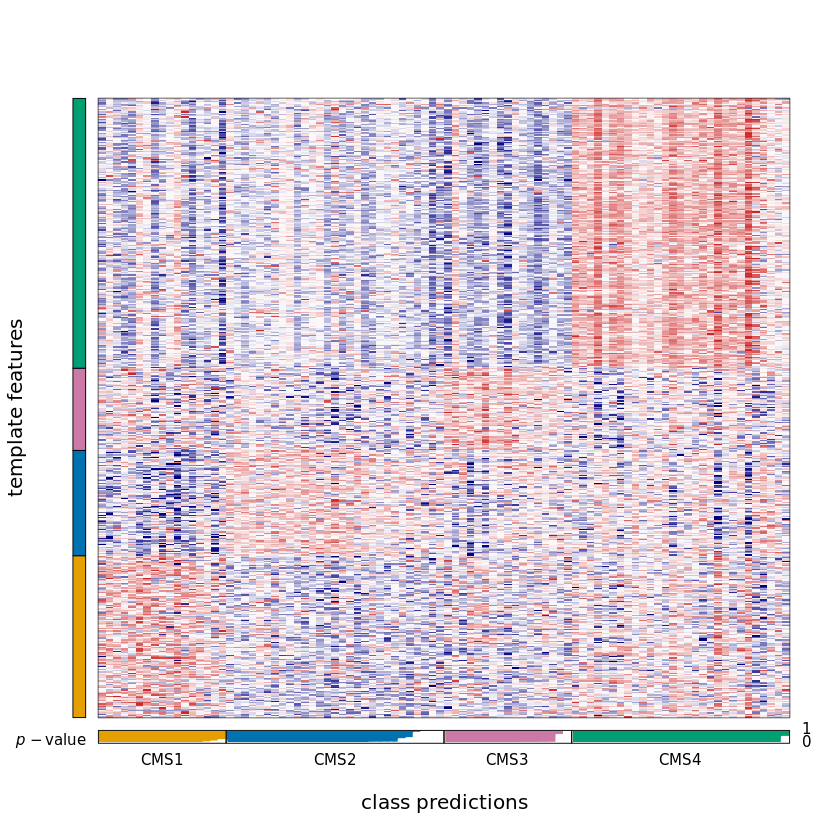

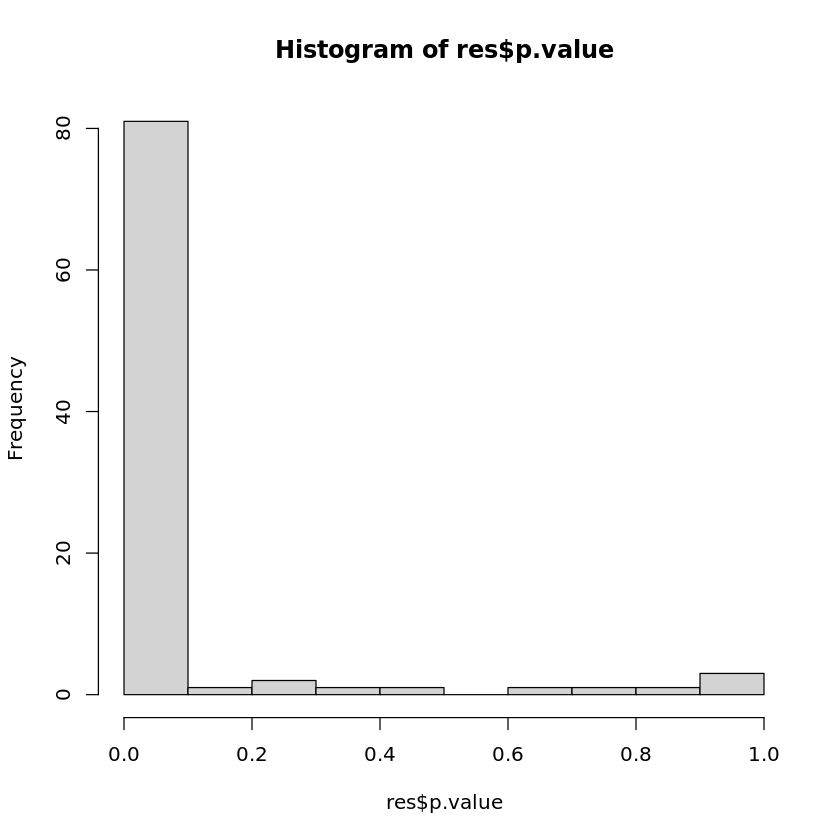

In [27]:
example("CMScaller") #works! ok so the example is good. yay!

In [163]:
#from: https://github.com/peterawe/CMScaller/issues/3
#optional: check if the genes in your data are in the templates used for subtyping CMS samples

#counts <- sampleData
#table(rownames(counts) %in% templates.CMS$probe, useNA="always")
#write.csv(templates.CMS, 'templates_cmscaller.csv')

#check the replaceGeneID function
#test = top_n(sampleData[1], 4)
#entrezID = replaceGeneId(sampleData, id.in = "ensg", id.out = "entrez") 
#^^this is the function used inside CMScaller, only works if you remove the versioning info (after the period)


36890/60659 rownames [NA.number] (no valid translation)

79/60659 rownames [id.number] (translation gives duplicates)

performing log2-transform and quantile normalization...

36969/60659 rownames(emat) failed to match to human gene identifiers

Warning message:
“verify that rownames(emat) are ensg”
cosine correlation distance

417/529 templates features not in emat, discarded

577 samples; 4 classes; 19-39 features/class

serial processing; 1000 permutation(s)...

predicted samples/class (FDR<0.05)




CMS1 CMS2 CMS3 CMS4 <NA> 
  77   98   72  124  206 


206/577 samples set to NA



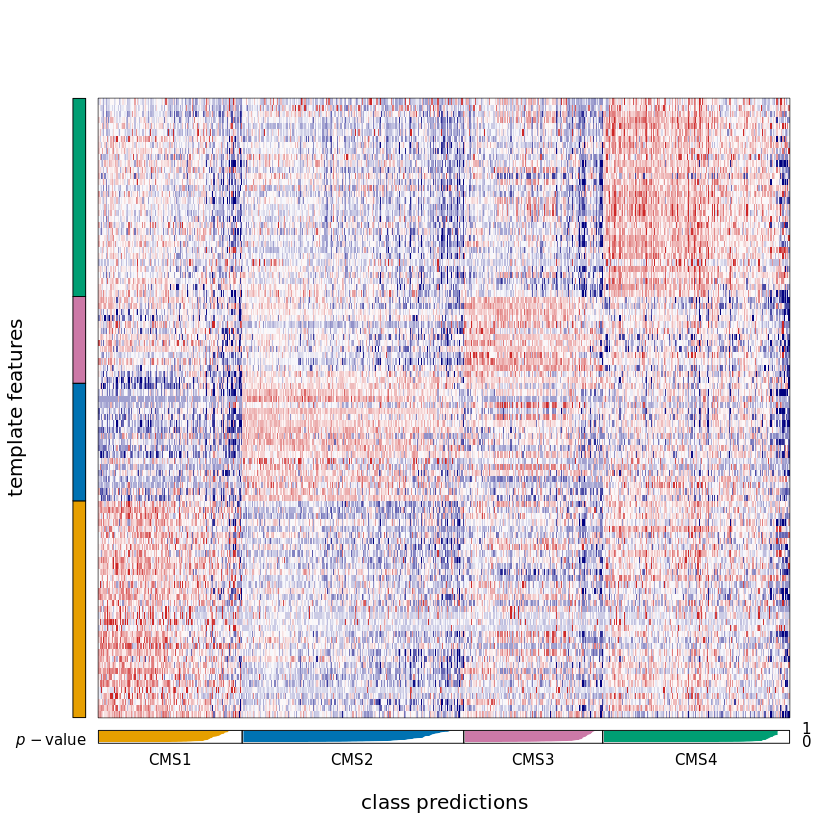

In [82]:
#USE THIS FOR RNASEQ w ensemblIDs! 
#remove the versioning, then pass rowNames as ensembl ("ensg" parameter)
a = rownames(sampleData) #grab the ensemblIDs
ensmblID_stripped = sub("*\\.[0-9]", "", a) #strip them using regex of everything after the period (.)
rownames(sampleData) = ensmblID_stripped #make them rownames again bc CMScaller expects the IDs to be row names
res <- CMScaller(sampleData, RNAseq=TRUE, doPlot=TRUE, rowNames = "") #be sure to pass rowNames="ensg"

In [156]:
#USE THIS FOR RNASEQ w HGNC! 
res <- CMScaller(sampleData, RNAseq=TRUE, doPlot=TRUE, rowNames = "symbol")

0/13 rownames [NA.number] (no valid translation)

0/13 rownames [id.number] (translation gives duplicates)

performing log2-transform and quantile normalization...

cosine correlation distance

529/529 templates features not in emat, discarded

<2 matched features/class



ERROR: Error: check templates$probe is matchable against rownames(emat)


In [188]:
#USE THIS FOR microarray data expression levels with entrezid
#remove entrez_id column, if exists after setting row.names to that column

#may have repeated gene IDs if more than one probe matches to that gene, even after RMA:
#https://bioinformatics.stackexchange.com/questions/3082/duplicate-gene-symbol-handling-in-geo-gene-expression-data

#use collapseRows to aggregate to gene level expression
#https://www.rdocumentation.org/packages/WGCNA/versions/1.71/topics/collapseRows

sampleData <- read.table('GEO_data/GSE72970_expression_matrix_raw.csv', sep=",",header = TRUE,check.names=FALSE) 


In [ ]:
data_only <- sampleData[, 1:124]
collapsed_data <- collapseRows(data_only, sampleData$entrez_id, rownames(sampleData), 
             method="MaxMean", connectivityBasedCollapsing=FALSE,
             methodFunction=NULL, connectivityPower=1,
             selectFewestMissing=TRUE, thresholdCombine=NA)

In [203]:
dim(collapsed_data$datETcollapsed)
head(collapsed_data$datETcollapsed)


write.csv(collapsed_data$datETcollapsed, 'GEO_data/GSE72970_genelevelexpression_matrix.csv')

[1] 35411   124

,GSM1875897,GSM1875898,GSM1875899,GSM1875900,GSM1875901,GSM1875902,GSM1875903,GSM1875904,GSM1875905,GSM1875906,⋯,GSM1876011,GSM1876012,GSM1876013,GSM1876014,GSM1876015,GSM1876016,GSM1876017,GSM1876018,GSM1876019,GSM1876020
10,8.293985,7.843415,6.938467,7.215872,6.391727,7.619402,9.378036,6.397840,8.840072,8.124922,⋯,7.368687,9.321897,7.711947,9.251508,5.427702,5.566483,8.903231,5.652385,9.499557,5.289448
100,8.163994,6.916187,7.756554,8.415470,7.793665,7.417628,7.483132,7.392226,7.740027,7.392667,⋯,6.740413,7.033339,7.974428,6.044235,6.836513,6.216799,7.439033,8.589182,8.017036,8.961782
1000,6.216392,6.392460,6.113381,5.710079,7.121346,6.517431,6.309919,6.085059,5.550282,5.578862,⋯,5.531246,6.051520,6.265509,5.734785,5.540122,5.903405,5.632783,5.346066,5.354300,5.380150
10000,5.982941,5.276512,6.267585,7.406841,8.177597,6.892591,7.908049,6.808414,6.967851,6.822259,⋯,7.145327,7.768157,8.455111,5.870275,8.266770,7.203759,6.975459,8.695998,7.516984,7.792660
100009676,5.521854,6.403854,5.836684,6.070767,4.361525,5.699826,4.936783,5.722869,5.625479,5.264466,⋯,5.420684,5.610872,5.460612,5.799970,5.427722,5.531225,5.282096,5.186960,5.424344,5.435326
10001,7.863832,7.191448,9.096529,7.176888,6.577583,8.520380,6.655484,7.725902,7.459373,7.154860,⋯,7.774901,7.495499,7.529619,7.892560,8.198827,9.192365,9.156438,8.443650,7.948496,8.340161


In [204]:
colnames(collapsed_data$datETcollapsed)

[1] "GSM1875897" "GSM1875898" "GSM1875899" "GSM1875900" "GSM1875901"
  [6] "GSM1875902" "GSM1875903" "GSM1875904" "GSM1875905" "GSM1875906"
 [11] "GSM1875907" "GSM1875908" "GSM1875909" "GSM1875910" "GSM1875911"
 [16] "GSM1875912" "GSM1875913" "GSM1875914" "GSM1875915" "GSM1875916"
 [21] "GSM1875917" "GSM1875918" "GSM1875919" "GSM1875920" "GSM1875921"
 [26] "GSM1875922" "GSM1875923" "GSM1875924" "GSM1875925" "GSM1875926"
 [31] "GSM1875927" "GSM1875928" "GSM1875929" "GSM1875930" "GSM1875931"
 [36] "GSM1875932" "GSM1875933" "GSM1875934" "GSM1875935" "GSM1875936"
 [41] "GSM1875937" "GSM1875938" "GSM1875939" "GSM1875940" "GSM1875941"
 [46] "GSM1875942" "GSM1875943" "GSM1875944" "GSM1875945" "GSM1875946"
 [51] "GSM1875947" "GSM1875948" "GSM1875949" "GSM1875950" "GSM1875951"
 [56] "GSM1875952" "GSM1875953" "GSM1875954" "GSM1875955" "GSM1875956"
 [61] "GSM1875957" "GSM1875958" "GSM1875959" "GSM1875960" "GSM1875961"
 [66] "GSM1875962" "GSM1875963" "GSM1875964" "GSM1875965" "GSM1875966"
 [71] "GSM1875967" "GSM1875968" "GSM1875969" "GSM1875970" "GSM1875971"
 [76] "GSM1875972" "GSM1875973" "GSM1875974" "GSM1875975" "GSM1875976"
 [81] "GSM1875977" "GSM1875978" "GSM1875979" "GSM1875980" "GSM1875981"
 [86] "GSM1875982" "GSM1875983" "GSM1875984" "GSM1875985" "GSM1875986"
 [91] "GSM1875987" "GSM1875988" "GSM1875989" "GSM1875990" "GSM1875991"
 [96] "GSM1875992" "GSM1875993" "GSM1875994" "GSM1875995" "GSM1875996"
[101] "GSM1875997" "GSM1875998" "GSM1875999" "GSM1876000" "GSM1876001"
[106] "GSM1876002" "GSM1876003" "GSM1876004" "GSM1876005" "GSM1876006"
[111] "GSM1876007" "GSM1876008" "GSM1876009" "GSM1876010" "GSM1876011"
[116] "GSM1876012" "GSM1876013" "GSM1876014" "GSM1876015" "GSM1876016"
[121] "GSM1876017" "GSM1876018" "GSM1876019" "GSM1876020"

16782/35411 rownames(emat) failed to match to human gene identifiers

Warning message:
“verify that rownames(emat) are entrez”
cosine correlation distance

5/529 templates features not in emat, discarded

124 samples; 4 classes; 80-235 features/class

serial processing; 1000 permutation(s)...

predicted samples/class (FDR<0.05)




CMS1 CMS2 CMS3 CMS4 <NA> 
  17   20   25   36   26 


26/124 samples set to NA



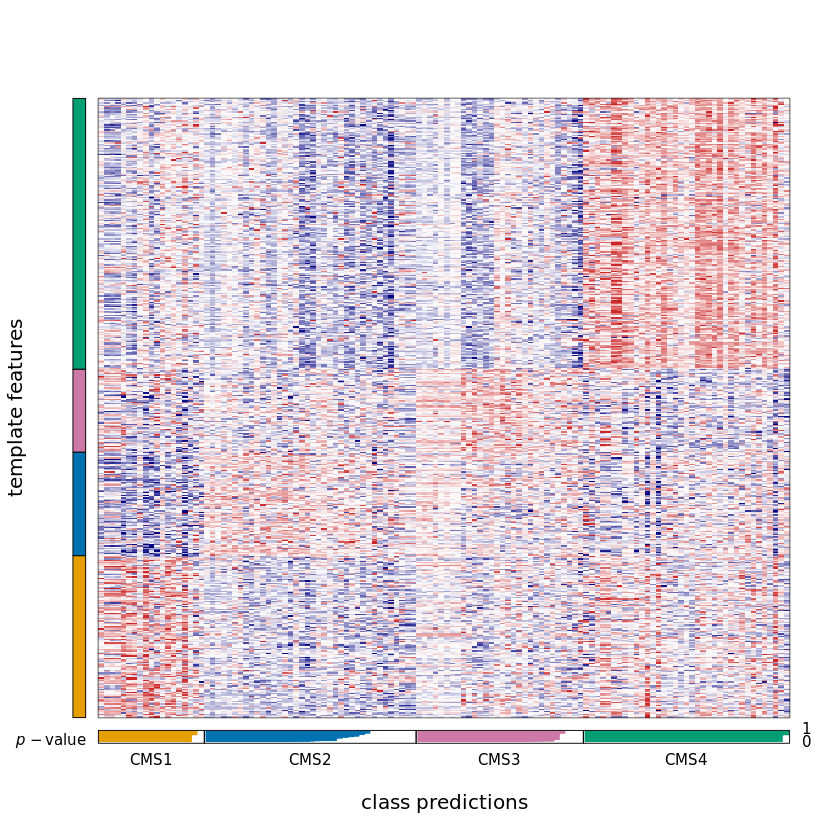

In [200]:
res <- CMScaller(collapsed_data$datETcollapsed, doPlot=TRUE, rowNames = "entrez")

In [201]:
write.csv(res, "gse72970_collapsed_cmscaller_subtype.csv", row.names=TRUE)

In [193]:
#naive dropping of duplicate hits
dup_drop = sampleData %>% distinct(entrez_id, .keep_all = TRUE)
row.names(dup_drop) = dup_drop$entrez_id

16782/35411 rownames(emat) failed to match to human gene identifiers

Warning message:
“verify that rownames(emat) are entrez”
cosine correlation distance

5/529 templates features not in emat, discarded

124 samples; 4 classes; 80-235 features/class

serial processing; 1000 permutation(s)...

predicted samples/class (FDR<0.05)




CMS1 CMS2 CMS3 CMS4 <NA> 
  15   23   21   35   30 


30/124 samples set to NA



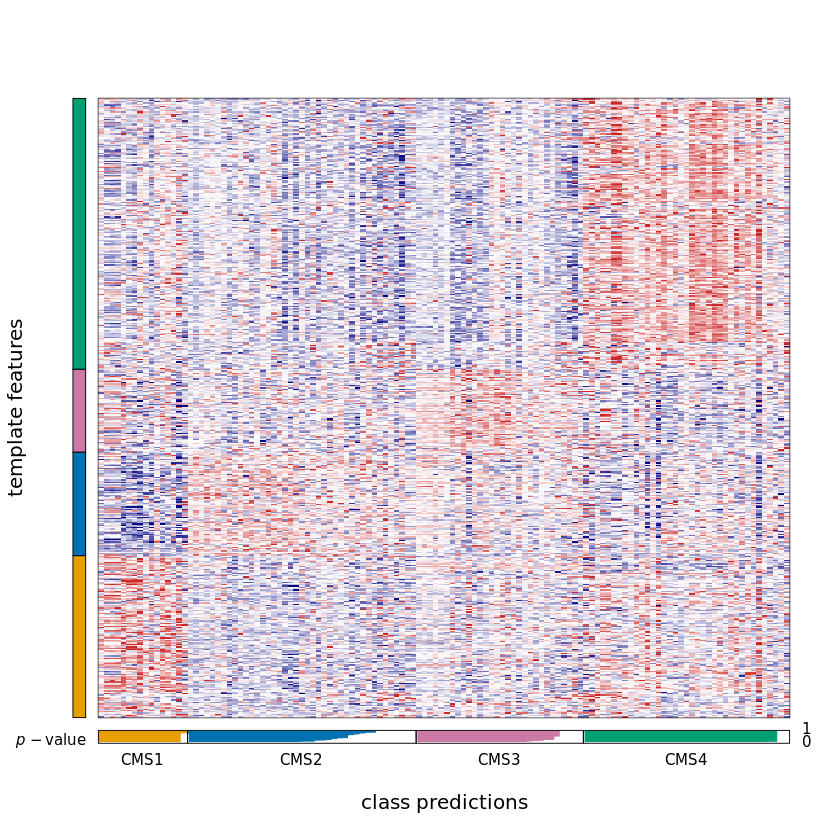

In [199]:
res <- CMScaller(dup_drop[1:124], doPlot=TRUE, rowNames = "entrez")